# Project 1 Group 6

## Questions

### Provided questions:
1. What factors, besides just temperature, lead to unsafe road conditions?
2. How does temperature interact with these factors?
3. What is the spatial distribution of bad road conditions?
4. Are bad road conditions significantly more prevalent in certain areas of Austin? What factors seem to be influencing that?

### Chloe's Questions:
1. What time of day or week sees the most unsafe road conditions, and how do other factors (traffic volume or weather conditions) contribute to this?
2. Are there seasonal trends in road conditions across Austin, and how do temperature, precipitation, and other environmental factors affect these trends?
3. What types of roads (e.g., highways, residential streets) are more prone to hazardous conditions, and how do external factors influence this?
4. What is the combined impact of temperature and humidity on the likelihood of unsafe road conditions?
5. How do various combinations of weather factors influence the likelihood of hazardous road conditions?
6. *if we are doing a dashboard* What kind of dashboard can help visualize unsafe road conditions in real time for specific areas of Austin for people to use?

### Joe's Questions

1. Are there certain locations that produce higher error conditions, and do they share a commonality (ie the same location, time, temperature etc.)
2. Does dirty lens have any correlation to road condition or temperature?
3. Does temperature affect road conditions in certain locations more than others?

## Cleaning the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Data Science Notebooks/Real-Time_Road_Conditions_20250116.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns

Index(['id', 'sensor_id', 'Location Name', 'Location', 'timestamp',
       'voltage_y', 'voltage_x', 'voltage_ratio', 'air_temp_secondary',
       'temp_surface', 'condition_code_displayed', 'condition_code_measured',
       'condition_text_displayed', 'condition_text_measured',
       'friction_code_displayed', 'friction_code_measured',
       'friction_value_displayed', 'friction_value_measured',
       'dirty_lens_score', 'grip_text', 'relative_humidity',
       'air_temp_primary', 'air_temp_tertiary', 'status_code'],
      dtype='object')

In [ ]:
## all columns to lowercare
df.columns = df.columns.str.lower()
#renaming location column
df.rename(columns={'location name': 'location_name'}, inplace=True)
#renamin gthe 2222 location
df['location_name'] = df['location_name'].replace('2222 RD / LAKEWOOD DR', 'FM 2222 RD / LAKEWOOD DR')
#dropped a few columns
#df = df.drop(columns= ["id", "location"]) ## dropped Id it is too specific to be of use
#converted to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')


In [ ]:
## cleaning of condition text
df['condition_text_displayed']= df['condition_text_displayed'].str.strip()
df['condition_text_displayed'].unique()

array(['UNK', 'SN1', 'DRY', 'WT1', 'WT2', 'MAX', 'WT3', 'IC1', 'IC2',
       'ERR'], dtype=object)

In [ ]:
#cleaning of condition text measured
df['condition_text_measured'] = df['condition_text_measured'].str.strip()
df['condition_text_measured'].unique()

array(['DRY', 'SN1', 'WT1', 'WT2', 'MAX', 'WT3', 'IC1', 'IC2', 'UNK',
       'ERR'], dtype=object)

In [ ]:
# Cleaning of grip text
df['grip_text']= df['grip_text'].str.strip()
df['grip_text'].unique()

array(['GOOD', 'FAIR', 'POOR'], dtype=object)

In [ ]:
df_group_year_month = df.groupby(by= ['sensor_id','location_name', df['timestamp'].dt.year, df['timestamp'].dt.month]).agg({'temp_surface': 'mean','air_temp_secondary': 'mean', 'air_temp_primary': 'mean', 'air_temp_tertiary': 'mean', 'relative_humidity': 'mean', 'friction_value_measured' : 'mean', 'voltage_x': 'mean', 'voltage_y': 'mean'})
df_group_year_month


temp_surface  \
sensor_id location_name                     timestamp timestamp                 
1         11TH ST / 35 SVRD                 2020      9             74.960292   
                                                      11            12.998916   
                                                      12            13.183082   
                                            2021      1             13.234989   
                                                      2             12.381064   
...                                                                       ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9             32.303628   
                                                      10            28.940177   
                                                      11            21.436563   
                                                      12            16.736177   
                                            2025      1             10.365783   

                                                                 air_temp_secondary  \
sensor_id location_name                     timestamp timestamp                       
1         11TH ST / 35 SVRD                 2020      9                   74.863406   
                                                      11                  10.314418   
                                                      12                  12.931534   
                                            2021      1                   12.648502   
                                                      2                   11.073198   
...                                                                             ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                   28.367463   
                                                      10                  26.011237   
                                                      11                  19.753092   
                                                      12                  15.786209   
                                            2025      1                    9.137017   

                                                                 air_temp_primary  \
sensor_id location_name                     timestamp timestamp                     
1         11TH ST / 35 SVRD                 2020      9                -58.884137   
                                                      11                10.326667   
                                                      12                13.008676   
                                            2021      1                 12.730911   
                                                      2                 11.116008   
...                                                                           ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                 28.178844   
                                                      10                25.834294   
                                                      11                19.550928   
                                                      12                15.571735   
                                            2025      1                  8.853543   

                                                                 air_temp_tertiary  \
sensor_id location_name                     timestamp timestamp                      
1         11TH ST / 35 SVRD                 2020      9                  44.707443   
                                                      11                 30.347443   
                                                      12                 32.253255   
                                            2021      1                  31.994979   
                                                      2                  30.182258   
...                                                                            ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                  38.843052   

In [ ]:
## df of sensor that needs calibration
df[df['status_code']==-102]
# now look at rows where sureface and air temperatures vary for more than 20 degrees and fill with mean
## look at how often each sensor has code -102, may give insight of accuracy of codition reported

,id,sensor_id,location_name,location,timestamp,voltage_y,voltage_x,voltage_ratio,air_temp_secondary,temp_surface,...,friction_code_displayed,friction_code_measured,friction_value_displayed,friction_value_measured,dirty_lens_score,grip_text,relative_humidity,air_temp_primary,air_temp_tertiary,status_code
0,425864,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-11 15:53:16,2559,2440,1.049,25.13,30.37,...,0,2,2.31,0.82,0,GOOD,34.06,25.29,44.31,-102
1,449960,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-24 08:45:12,1498,768,1.951,-0.53,-0.53,...,23,23,0.35,0.35,4,FAIR,83.70,-0.67,18.11,-102
2,510965,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-03-13 04:42:32,2238,2129,1.051,5.27,100.10,...,2,2,0.82,0.82,0,GOOD,44.19,5.09,22.82,-102
3,463467,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-27 22:43:09,2823,2444,1.155,8.87,8.03,...,2,8,0.82,0.70,0,GOOD,54.24,8.79,27.14,-102
5,405588,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-01-29 05:31:25,1890,1803,1.048,100.10,100.10,...,3,3,0.80,0.80,0,GOOD,101.00,-101.00,21.88,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352924,3342147,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-03 11:52:19,1702,1667,1.021,100.10,100.10,...,0,3,2.31,0.80,4,GOOD,101.00,-101.00,28.80,-102
3352931,3342068,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-03 11:25:35,1604,1556,1.031,100.10,100.10,...,4,4,0.77,0.77,4,GOOD,101.00,-101.00,28.81,-102
3352939,3337397,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-02 08:12:00,1988,1922,1.034,100.10,100.10,...,2,2,0.82,0.82,0,GOOD,101.00,-101.00,25.64,-102
3352943,3359784,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-08 17:12:20,1880,1796,1.047,100.10,100.10,...,3,3,0.80,0.80,4,GOOD,101.00,-101.00,34.31,-102


In [ ]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %I:%M:%S %p')
# Extract components for further analysis
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour

In [ ]:
#In case you are interested in the heat map, it has no string columns and only includes measurements but you are welcomed to add code columns i.e. columns that report in dicrete numbers like 1,2,3,4,5
## dropps all text columns
column_types = df.dtypes
string_columns = [col for col, dtype in column_types.items() if dtype == 'object']
df_no_strings = df.drop(columns= string_columns)
## need to check why condition_code_displayed is automaticallly dropped, not a text column
## if you want to add it may have to create columns for each code first, ask me how if you neeed help, thesee are all dicrete reportings
df_no_strings= df_no_strings.drop(columns= ['sensor_id','condition_code_measured', 'friction_code_displayed', 'friction_code_measured','dirty_lens_score'])
print(df_no_strings.columns)
## correlation map
corr = df_no_strings.corr()
corr.style.background_gradient(cmap='coolwarm')

Index(['id', 'timestamp', 'voltage_y', 'voltage_x', 'voltage_ratio',
       'air_temp_secondary', 'temp_surface', 'condition_code_displayed',
       'friction_value_displayed', 'friction_value_measured',
       'relative_humidity', 'air_temp_primary', 'air_temp_tertiary',
       'status_code', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


,id,timestamp,voltage_y,voltage_x,voltage_ratio,air_temp_secondary,temp_surface,condition_code_displayed,friction_value_displayed,friction_value_measured,relative_humidity,air_temp_primary,air_temp_tertiary,status_code,Year,Month,Day,Hour
id,1.000000,0.981802,-0.298018,-0.204381,-0.161410,-0.035380,-0.069403,0.026529,-0.157573,-0.168618,0.038735,0.067201,-0.069976,0.375765,0.935515,0.208290,0.000659,-0.000320
timestamp,0.981802,1.000000,-0.308643,-0.206548,-0.185833,-0.021087,-0.050390,0.028091,-0.181110,-0.183059,0.036053,0.066961,-0.078783,0.468880,0.953186,0.211187,0.003281,-0.000218
voltage_y,-0.298018,-0.308643,1.000000,0.952414,-0.149590,0.166390,0.192001,-0.384840,0.385869,0.682438,-0.142910,-0.146401,0.110850,-0.307521,-0.295865,-0.058791,-0.014399,0.028433
voltage_x,-0.204381,-0.206548,0.952414,1.000000,-0.357102,0.191458,0.214676,-0.453409,0.399013,0.757433,-0.171470,-0.132565,0.142863,-0.240366,-0.194806,-0.049011,-0.015980,0.028594
voltage_ratio,-0.161410,-0.185833,-0.149590,-0.357102,1.000000,-0.014245,-0.019101,0.429181,-0.127194,-0.400662,0.157691,-0.110928,-0.117119,-0.187868,-0.176086,-0.043826,0.006246,-0.009560
air_temp_secondary,-0.035380,-0.021087,0.166390,0.191458,-0.014245,1.000000,0.928657,-0.140901,0.326272,0.191469,0.203116,-0.659490,0.478250,-0.481905,-0.028025,0.024069,-0.022699,0.073052
temp_surface,-0.069403,-0.050390,0.192001,0.214676,-0.019101,0.928657,1.000000,-0.151329,0.307371,0.204531,0.081269,-0.571237,0.527248,-0.493175,-0.049864,-0.002891,-0.012065,0.095636
condition_code_displayed,0.026529,0.028091,-0.384840,-0.453409,0.429181,-0.140901,-0.151329,1.000000,-0.418176,-0.577780,0.188064,0.024341,-0.180615,0.082110,0.012512,0.050427,0.018753,-0.022565
friction_value_displayed,-0.157573,-0.181110,0.385869,0.399013,-0.127194,0.326272,0.307371,-0.418176,1.000000,0.484232,0.017894,-0.317001,0.134762,-0.432628,-0.168599,-0.050634,-0.009088,0.015396
friction_value_measured,-0.168618,-0.183059,0.682438,0.757433,-0.400662,0.191469,0.204531,-0.577780,0.484232,1.000000,-0.160503,-0.146449,0.140491,-0.274723,-0.172283,-0.045216,-0.007063,0.017467


In [ ]:
# Count how many of each year pop up
df['Year'].value_counts()

,count
Year,
2023,1678416
2024,1522123
2022,1280308
2021,201623
2025,65935
2020,50951


In [ ]:
# Remove 2025 and 2020 from year column
df = df[~df['Year'].isin([2025, 2020])]

In [ ]:
# Count how many years pop up
df['Year'].value_counts()

,count
Year,
2023,1678416
2024,1522123
2022,1280308
2021,201623


In [ ]:
# rename condition codes
# Define a dictionary to map old values to new values
condition_mapping = {
    'UNK': 'Unknown',
    ' UNK': 'Unknown',
    'DRY': 'Dry',
    ' DRY': 'Dry',
    'WT1': 'Damp',
    ' WT1': 'Damp',
    'WT2': 'Wet',
    ' WT2': 'Wet',
    'SN1': 'Snow',
    ' SN1': 'Snow',
    'IC1': 'Ice',
    ' IC1': 'Ice',
    'WT3': 'Standing Water',
    ' WT3': 'Standing Water',
    'SN2': 'Deep Snow',
    ' SN2': 'Deep Snow',
    'IC2': 'Black Ice',
    ' IC2': 'Black Ice',
    'MAX': 'Unknown',
    'ERR' : 'Unknown',
    'ERROR': 'Unknown'
}

In [ ]:
# Show the condition text displayed column
df['condition_text_displayed']

,condition_text_displayed
0,Unknown
1,Snow
2,Dry
3,Dry
4,Dry
...,...
4733416,Dry
4733417,Dry
4733418,Dry
4733419,Dry


In [ ]:
# Show location column and how many of each there is
df['location_name'].value_counts()

,count
location_name,
FM 2222 RD / LAKEWOOD DR,1443818
LAKELINE BLVD / 183 HWY SVRD,1395238
BEN WHITE BLVD SVRD / BANISTER LN,1299173
11TH ST / 35 SVRD,544241


In [ ]:
# Drop 11TH ST / 35 SVRD rows
df = df[df['location_name'] != '11TH ST / 35 SVRD']

In [ ]:
# show location
df['location_name']

,location_name
4,FM 2222 RD / LAKEWOOD DR
6,FM 2222 RD / LAKEWOOD DR
7,FM 2222 RD / LAKEWOOD DR
13,FM 2222 RD / LAKEWOOD DR
15,FM 2222 RD / LAKEWOOD DR
...,...
4733416,FM 2222 RD / LAKEWOOD DR
4733417,BEN WHITE BLVD SVRD / BANISTER LN
4733418,LAKELINE BLVD / 183 HWY SVRD
4733419,FM 2222 RD / LAKEWOOD DR


## Graphs

In [ ]:
# Create a dictionary to map old location names to new names
location_mapping = {
    'LAKELINE BLVD / 183 HWY SVRD': 'NORTH AUSTIN',
    'FM 2222 RD / LAKEWOOD DR': 'NORTH WEST AUSTIN',
    '11TH ST / 35 SVRD': 'DOWNTOWN',
    'BEN WHITE BLVD SVRD / BANISTER LN': 'SOUTH AUSTIN'
}

# Replace the location names in the 'location_name' column
df['location_name'] = df['location_name'].replace(location_mapping)

In [ ]:
# Drop rows where location_name is DOWNTOWN
df = df[df['location_name'] != 'DOWNTOWN']

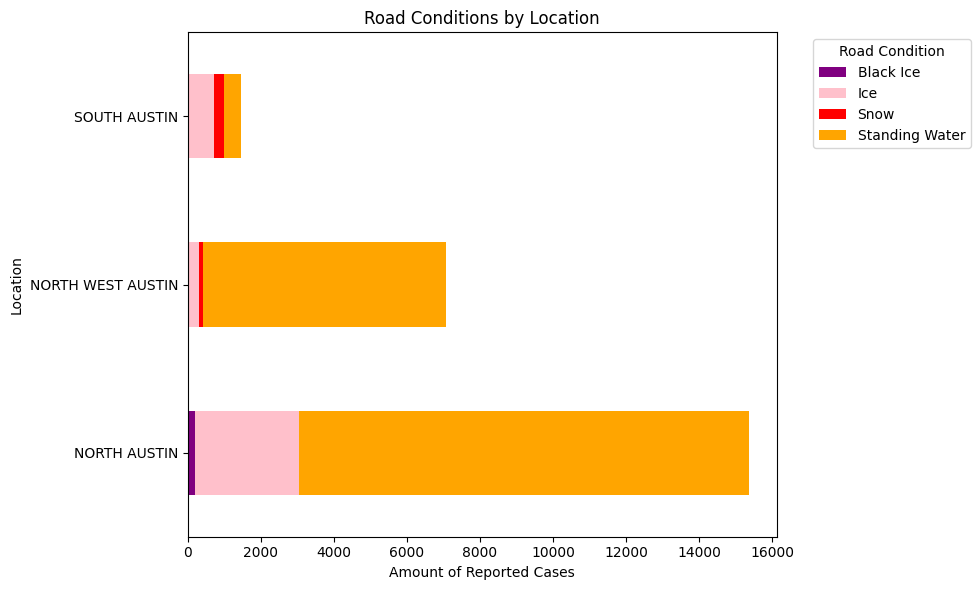

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and contains the location and condition data

# Filter the DataFrame for the desired conditions and locations
bad_conditions = ['Black Ice', 'Ice', 'Snow', 'Standing Water']
locations = ['NORTH AUSTIN', 'NORTH WEST AUSTIN', 'SOUTH AUSTIN']

# Ensure location_name and condition_text_displayed are strings
df['location_name'] = df['location_name'].astype(str)
df['condition_text_displayed'] = df['condition_text_displayed'].astype(str)

filtered_df = df[df['condition_text_displayed'].isin(bad_conditions) & df['location_name'].isin(locations)]


# Group by location and condition, then count occurrences
location_condition_counts = filtered_df.groupby(['location_name', 'condition_text_displayed'])['condition_text_displayed'].count().unstack(fill_value=0)

# Check if location_condition_counts is empty and handle accordingly
if location_condition_counts.empty:
    print("No data found for the specified conditions and locations.")
else:
    # Define custom colors and the desired legend order
    custom_colors = {
        'Black Ice': 'purple',
        'Ice': 'pink',
        'Snow': 'red',
        'Standing Water': 'orange',
    }

    # Define the desired legend order
    desired_order = ['Black Ice', 'Ice', 'Snow', 'Standing Water']

    # Reindex the dataframe to match the desired order, ensuring all conditions are present
    location_condition_counts = location_condition_counts.reindex(columns=desired_order, fill_value=0)

    # Get colors in the specified order
    colors = [custom_colors[condition] for condition in desired_order]

    # Create a stacked horizontal bar plot with custom colors and order
    ax = location_condition_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

    # Customize plot labels
    plt.title('Road Conditions by Location')
    plt.xlabel('Amount of Reported Cases')
    plt.ylabel('Location')

    # Manually set legend order
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles, labels, title='Road Condition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Use handles, labels directly

    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

<Figure size 1200x800 with 0 Axes>

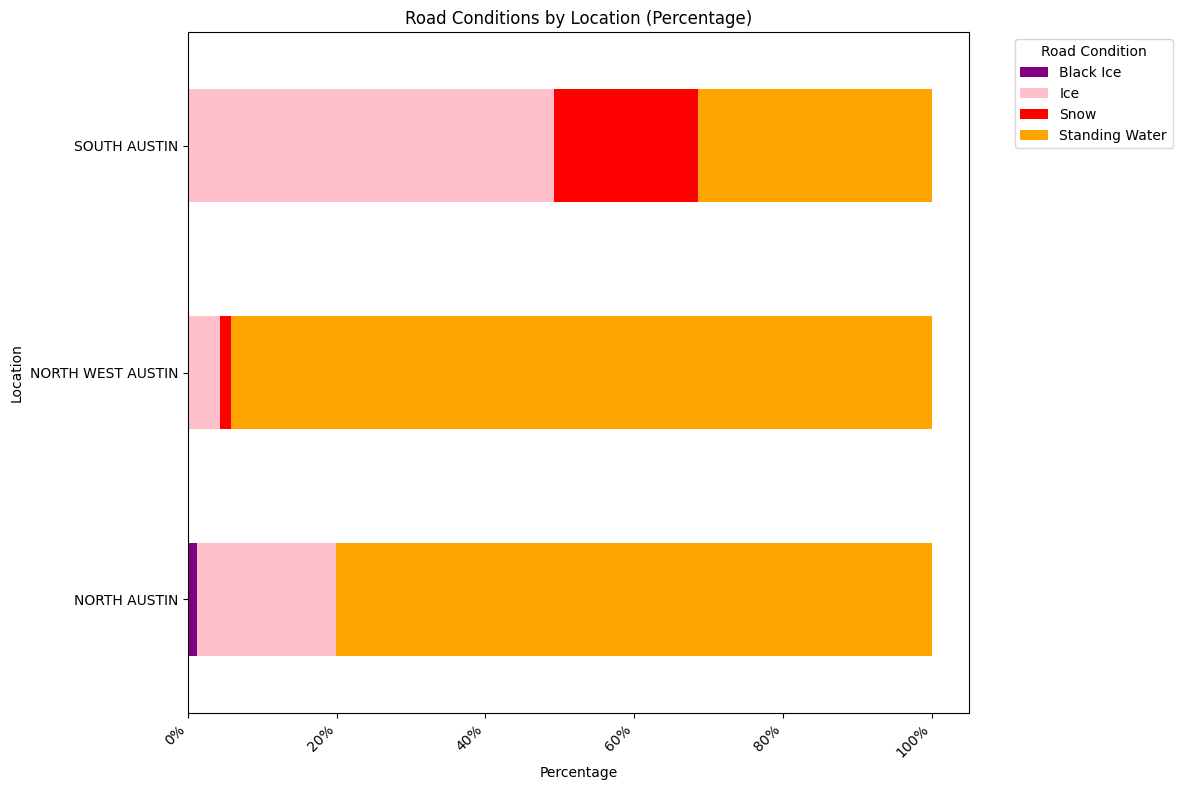

In [ ]:
import matplotlib.pyplot as plt

# Percentage graph comparing bad road conditiions and locations
# Define custom colors and the desired legend order
custom_colors = {
    'Black Ice': 'purple',
    'Ice': 'pink',
    'Snow': 'red',
    'Standing Water': 'orange',
}

# Define the desired legend order
desired_order = ['Black Ice', 'Ice', 'Snow', 'Standing Water']

# Ensure only relevant conditions are included and normalize to percentages
location_condition_counts = location_condition_counts[desired_order]  # Keep only selected columns
location_condition_percent = location_condition_counts.div(location_condition_counts.sum(axis=1), axis=0) * 100  # Convert to percentage

# Get colors in the specified order
colors = [custom_colors[condition] for condition in desired_order]

# Create a stacked bar plot with custom colors and percentages
plt.figure(figsize=(12, 8))  # Increase width and height
ax = location_condition_percent.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)

# Customize plot labels
plt.title('Road Conditions by Location (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Format x-axis to show percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Manually set legend order
handles, labels = ax.get_legend_handles_labels()
ordered_handles = [handles[desired_order.index(label)] for label in labels]
ordered_labels = [desired_order[desired_order.index(label)] for label in labels]
ax.legend(ordered_handles, ordered_labels, title='Road Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

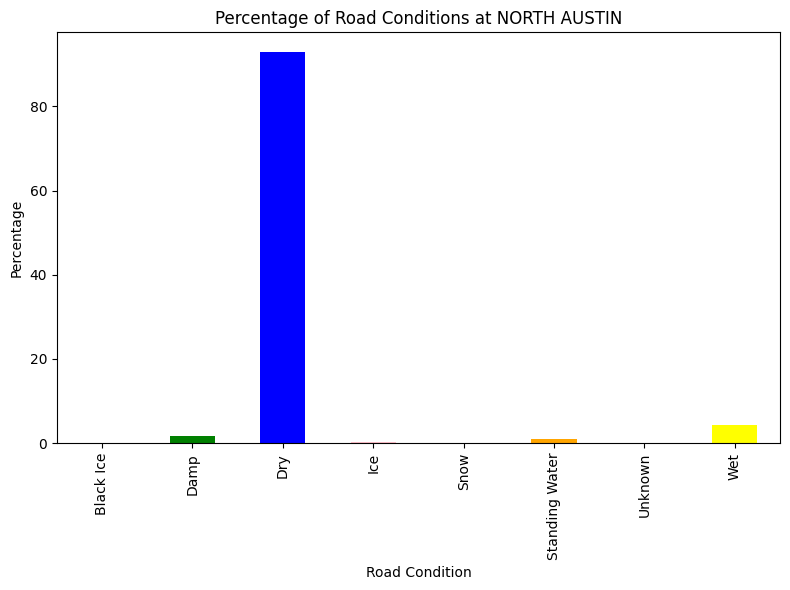

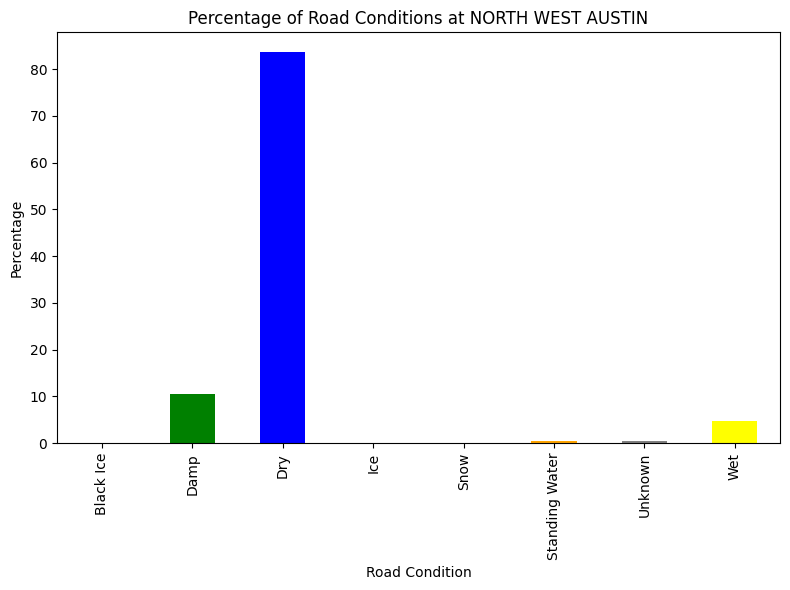

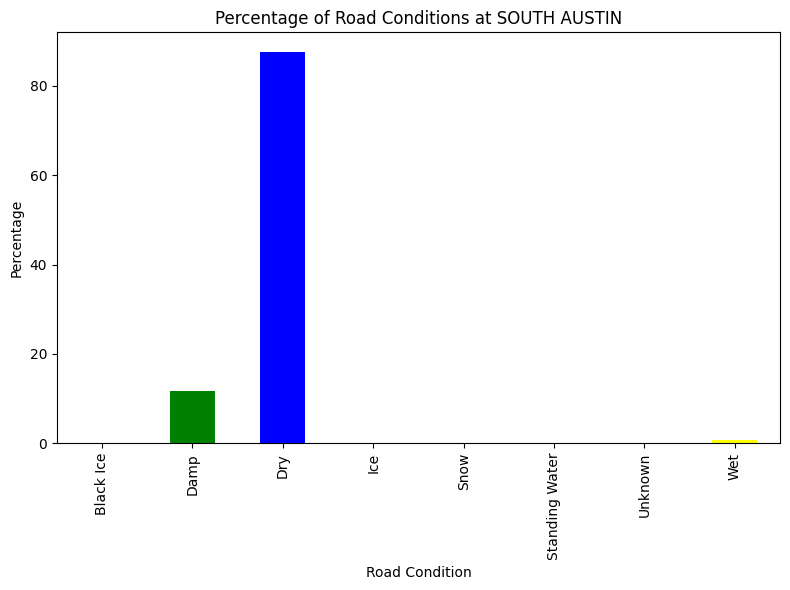

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'

# All conditions to consider
all_conditions = ['Black Ice', 'Ice', 'Snow', 'Standing Water', 'Dry', 'Damp', 'Wet', 'Unknown']
filtered_df = df[df['condition_text_displayed'].isin(all_conditions)]

# Group by location and condition, then count occurrences
location_condition_counts = filtered_df.groupby(['location_name', 'condition_text_displayed'])['condition_text_displayed'].count().unstack(fill_value=0)

# Calculate percentages for each condition within each location
percentage_df = location_condition_counts.apply(lambda row: row / row.sum() * 100, axis=1)

# Define custom colors for all conditions
custom_colors = {
    'Black Ice': 'purple',
    'Ice': 'pink',
    'Snow': 'red',
    'Standing Water': 'orange',
    'Dry': 'blue',
    'Damp': 'green',
    'Wet': 'yellow',
    'Unknown': 'gray'
}

# Create separate plots for each location
for location in percentage_df.index:
    location_data = percentage_df.loc[location]

    # Get colors in the desired order
    colors = [custom_colors[condition] for condition in location_data.index if condition in custom_colors]

    # Create a bar plot for the current location
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    location_data.plot(kind='bar', color=colors)
    plt.title(f'Percentage of Road Conditions at {location}')
    plt.xlabel('Road Condition')
    plt.ylabel('Percentage')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Filter the DataFrame for the desired conditions
bad_conditions = ['Black Ice', 'Ice', 'Snow', 'Standing Water']
filtered_df = df[df['condition_text_displayed'].isin(bad_conditions)]

# Group by location and condition, then count occurrences
location_condition_counts = filtered_df.groupby(['location_name', 'condition_text_displayed'])['condition_text_displayed'].count().unstack(fill_value=0)

# Calculate percentages for each condition within each location
percentage_df = location_condition_counts.apply(lambda row: row / row.sum() * 100, axis=1)

# Display the results in a table
print(percentage_df)

condition_text_displayed  Black Ice        Ice       Snow  Standing Water
location_name                                                            
NORTH AUSTIN               1.223958  18.684896   0.000000       80.091146
NORTH WEST AUSTIN          0.000000   4.311563   1.526718       94.161719
SOUTH AUSTIN               0.000000  49.282297  19.343814       31.373889


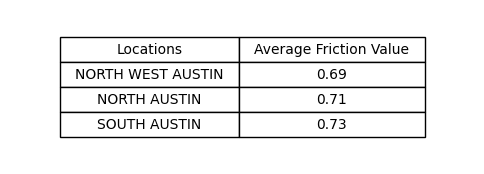

In [ ]:
# This information was on Tableau
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table

# Data
data = {
    "Locations": ["NORTH WEST AUSTIN", "NORTH AUSTIN", "SOUTH AUSTIN"],
    "Average Friction Value": [0.69, 0.71, 0.73]
}

# Create dataframe
df = pd.DataFrame(data)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.scale(1, 1.5)  # Scale the table for better readability
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Set white background
fig.patch.set_facecolor('white')

# Display the table
plt.show()

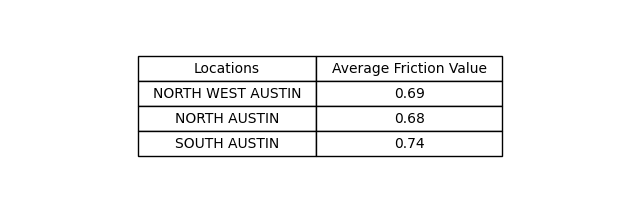

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the second table
data_january = {
    "Locations": ["NORTH WEST AUSTIN", "NORTH AUSTIN", "SOUTH AUSTIN"
    ],
    "Average Friction Value": [0.69, 0.68, 0.74]
}

# Create dataframe
df_january = pd.DataFrame(data_january)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df_january.values, colLabels=df_january.columns, cellLoc='center', loc='center')

# Style the table
table.scale(1, 1.5)  # Scale the table for better readability
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_january.columns))))

# Set white background
fig.patch.set_facecolor('white')

# Display the table
plt.show()
